# Neural Network

Xây dựng neural network với hai tầng ẩn (hidden layer).
Các trọng số và mối liên hệ giữa các tầng ẩn được thiết lập
và cài đặt bằng tay.

## Neural Network Overview

<img src="http://cs231n.github.io/assets/nn1/neural_net2.jpeg" alt="nn" style="width: 400px;"/>

## MNIST Dataset Overview

MNIST là bộ dữ liệu chứa các ảnh là các ký tự viết tay, chia thành 2 phần, 60000 ảnh dùng để huấn luyện và 10000 ảnh dùng để kiểm thử. Kích thước các ảnh là 28x28, giá trị các pixel thuộc [0,255]


![MNIST Dataset](http://neuralnetworksanddeeplearning.com/images/mnist_100_digits.png)

More info: http://yann.lecun.com/exdb/mnist/

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# MNIST dataset parameters.
num_classes = 10 # total classes (0-9 digits).
num_features = 784 # data features (img shape: 28*28).

# Network parameters.
n_hidden_1 = 128 # 1st layer number of neurons.
# n_hidden_2 = 256 # 2nd layer number of neurons.

In [3]:
# Chuẩn bị dữ liệu
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Chuyển đổi sang định dạng float32.
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)
x_train, x_test = x_train.reshape([-1, num_features]).T, x_test.reshape([-1, num_features]).T
# Chuẩn hóa ảnh từ from [0, 255] to [0, 1].
x_train, x_test = x_train / 255., x_test / 255.

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
m = x_train.shape[0]

In [5]:
def cross_entropy(predictions, targets, epsilon=1e-12):
    """
    Computes cross entropy between targets (encoded as one-hot vectors)
    and predictions.
    Input: predictions (N, k) ndarray
           targets (N, k) ndarray
    Returns: scalar
    """
    predictions = np.clip(predictions, epsilon, 1. - epsilon)
    N = predictions.shape[0]
    ce = -np.sum(targets*np.log(predictions+1e-9))/N
    return ce

In [13]:
def init_params():
    W1 = np.random.rand(n_hidden_1, 784) - 0.5
    b1 = np.random.rand(n_hidden_1, 1) - 0.5
    W2 = np.random.rand(num_classes, n_hidden_1) - 0.5
    b2 = np.random.rand(num_classes, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def cross_entropy(predictions, targets, epsilon=1e-12):
    """
    tính giá trị cross entropy giữa targets và predictions.
    Input: predictions (N, k)
           targets (N, k)
    Returns: scalar
    """
    predictions = np.clip(predictions, epsilon, 1. - epsilon)
    N = predictions.shape[0]
    ce = -np.sum(targets*np.log(predictions+1e-9))/N
    return ce

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [14]:
losses = []
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    # print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        predictions = get_predictions(A2)
        losses.append(cross_entropy(predictions, Y))
        if i % 10 == 9:
            # print("Iteration: ", i+1)
            # predictions = get_predictions(A2)
            # print('Accuracy: %.3f' %(get_accuracy(predictions, Y)))
            print('Iteration: %d, accuracy: %.3f' %(i + 1, get_accuracy(predictions, Y)))
    return W1, b1, W2, b2

In [15]:
alpha = 0.01
n_epoch = 100
W1, b1, W2, b2 = gradient_descent(x_train, y_train, alpha, 100)

Iteration: 10, accuracy: 0.470
Iteration: 20, accuracy: 0.643
Iteration: 30, accuracy: 0.731
Iteration: 40, accuracy: 0.826
Iteration: 50, accuracy: 0.844
Iteration: 60, accuracy: 0.846
Iteration: 70, accuracy: 0.874
Iteration: 80, accuracy: 0.883
Iteration: 90, accuracy: 0.889
Iteration: 100, accuracy: 0.891


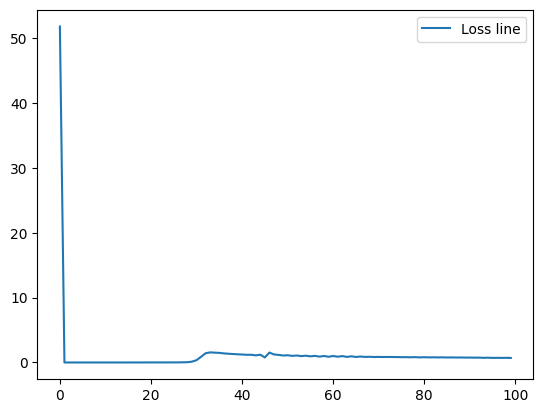

In [16]:
# Biểu đồ biểu diễn độ biến thiên của hàm mất mát qua các vòng lặp
plt.plot([i for i in range(len(losses))], losses, label='Loss line')
# plt.plot(X, np.array(W * X + b), label='Fitted line')
plt.legend()
plt.show()